[CiFAR-10 dataset  & FashionMNIST 기반  이미지 분류 모델]

In [121]:
import os
import cv2
import zipfile

In [122]:
ZIP = '/fashionmnist.zip'
FOLDER = '/content/dataset/'

In [123]:
# 압축 해제
with zipfile.ZipFile(ZIP, 'r') as zip_ref:
	zip_ref.extractall(FOLDER)

In [124]:
# 압축 해제된 파일 목록 확인
FOLDER2 = '../content/dataset/'
extracted_files = os.listdir(FOLDER2)
extracted_files

['train-labels-idx1-ubyte',
 'fashion-mnist_train.csv',
 't10k-images-idx3-ubyte',
 'train-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'fashion-mnist_test.csv']

[3] CSV 파일 정리

In [125]:
import pandas as pd

In [126]:
train = os.path.join(FOLDER2, 'fashion-mnist_train.csv')
test = os.path.join(FOLDER2, 'fashion-mnist_test.csv')

In [127]:
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [128]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [131]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [132]:
print('학습:', train_data.shape)
print('검증 :', test_data.shape)

학습: (60000, 785)
검증 : (10000, 785)


[4] 데이터셋 구성



In [133]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [134]:
train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32') / 255.0
train_labels = train_data.iloc[:,0].values

In [135]:
train_images

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [136]:
train_labels

array([2, 9, 6, ..., 8, 8, 7])

In [137]:
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32') / 255.0
test_labels = test_data.iloc[:,0].values

In [138]:
test_images

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.01568628, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.00392157, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [139]:
test_labels

array([0, 1, 2, ..., 8, 8, 1])

In [140]:
train_images = torch.tensor(train_images).unsqueeze(1)
train_labels = torch.tensor(train_labels, dtype=torch.long)

In [141]:
train_images

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [142]:
train_labels

tensor([2, 9, 6,  ..., 8, 8, 7])

In [143]:
test_images = torch.tensor(test_images).unsqueeze(1)
test_labels = torch.tensor(test_labels, dtype=torch.long)

In [144]:
test_images

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [145]:
test_labels

tensor([0, 1, 2,  ..., 8, 8, 1])

In [146]:
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

In [147]:
train_ld = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_ld = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [148]:
for images, labels in test_ld:
    print("images:", images.shape)
    print("labels:", labels.shape)
    break


images: torch.Size([64, 1, 28, 28])
labels: torch.Size([64])


[4]모델 학습

In [149]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [150]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionCNN().to(device)

In [151]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [152]:
for epoch in range(5):
    running_loss = 0.0
    model.train()
    for images, labels in train_ld:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_ld):.4f}")

Epoch 1, Loss: 0.4624
Epoch 2, Loss: 0.3008
Epoch 3, Loss: 0.2550
Epoch 4, Loss: 0.2253
Epoch 5, Loss: 0.2012


[5]정확도 검정 및 예측 시각화

In [153]:
# 성능 평가
model.eval()
correct_num = 0
total_num = 0

In [155]:
with torch.no_grad():
    for images, labels in test_ld:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct_num += (predicted == labels).sum().item()
        total_num += labels.size(0)

print(f"테스트 정확도: {100 * correct_num / total_num:.2f}%")

테스트 정확도: 91.93%


[6]예측 결과 시각화

In [156]:
import matplotlib.pyplot as plt

In [157]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

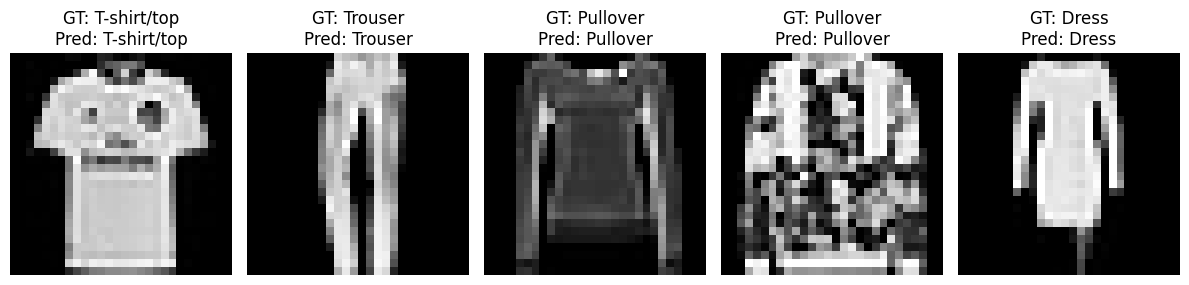

In [158]:
plt.figure(figsize=(12, 3))
for i in range(5):
    image = test_images[i]
    label = test_labels[i]

    with torch.no_grad():
        output = model(image.unsqueeze(0).to(device))
        _, pred = torch.max(output, 1)

    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"GT: {class_names[label]}\nPred: {class_names[pred.item()]}")
    plt.axis('off')

plt.tight_layout()
plt.show()